In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E Commerce Dataset.xlsx to E Commerce Dataset.xlsx


# Stage 1

## Descriptive Statistics

In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [ ]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3215,53216,1,1.0,Mobile Phone,3,10.0,Debit Card,Female,4.0,4,Laptop & Accessory,3,Single,11,0,15.0,2.0,3.0,1.0,170.77
2415,52416,0,1.0,Computer,3,13.0,Debit Card,Male,2.0,3,Laptop & Accessory,5,Single,1,0,14.0,1.0,1.0,3.0,148.98
1570,51571,0,NaN,Phone,1,9.0,Debit Card,Male,3.0,4,Mobile,1,Married,4,0,17.0,0.0,1.0,0.0,121.77
2015,52016,0,0.0,Phone,1,NaN,Debit Card,Female,3.0,3,Mobile,3,Single,2,0,19.0,0.0,1.0,0.0,123.18
5611,55612,0,12.0,Mobile Phone,3,17.0,Debit Card,Female,4.0,4,Laptop & Accessory,1,Married,3,0,12.0,1.0,2.0,10.0,178.43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df.duplicated().sum()

0

*   Semua kolom dengan tipe datanya sudah sesuai 
*   Terdapat kolom yang terdapat missing value yaitu Tenure, Warehouse To Home, HourSpend On App, Order Amount Hike From last Year, Coupon Used, Order Count, Day Since Last Order
*   Semua nilai summary (min/mean/median/max/unique/top/freq) sudah sesuai


## Univariate Analysis
Melakukan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). 

In [ ]:
# pengelompokan kolom berdasarkan jenisnya

cats = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
nums = ['CustomerID','Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress',
        'Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

In [ ]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [ ]:
df[cats].describe().transpose()

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [ ]:
for col in cats:
  print(f'''Value Count Kolom {col}:''')
  print(df[col].value_counts())
  print()

Value Count Kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value Count Kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value Count Kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value Count Kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value Count Kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



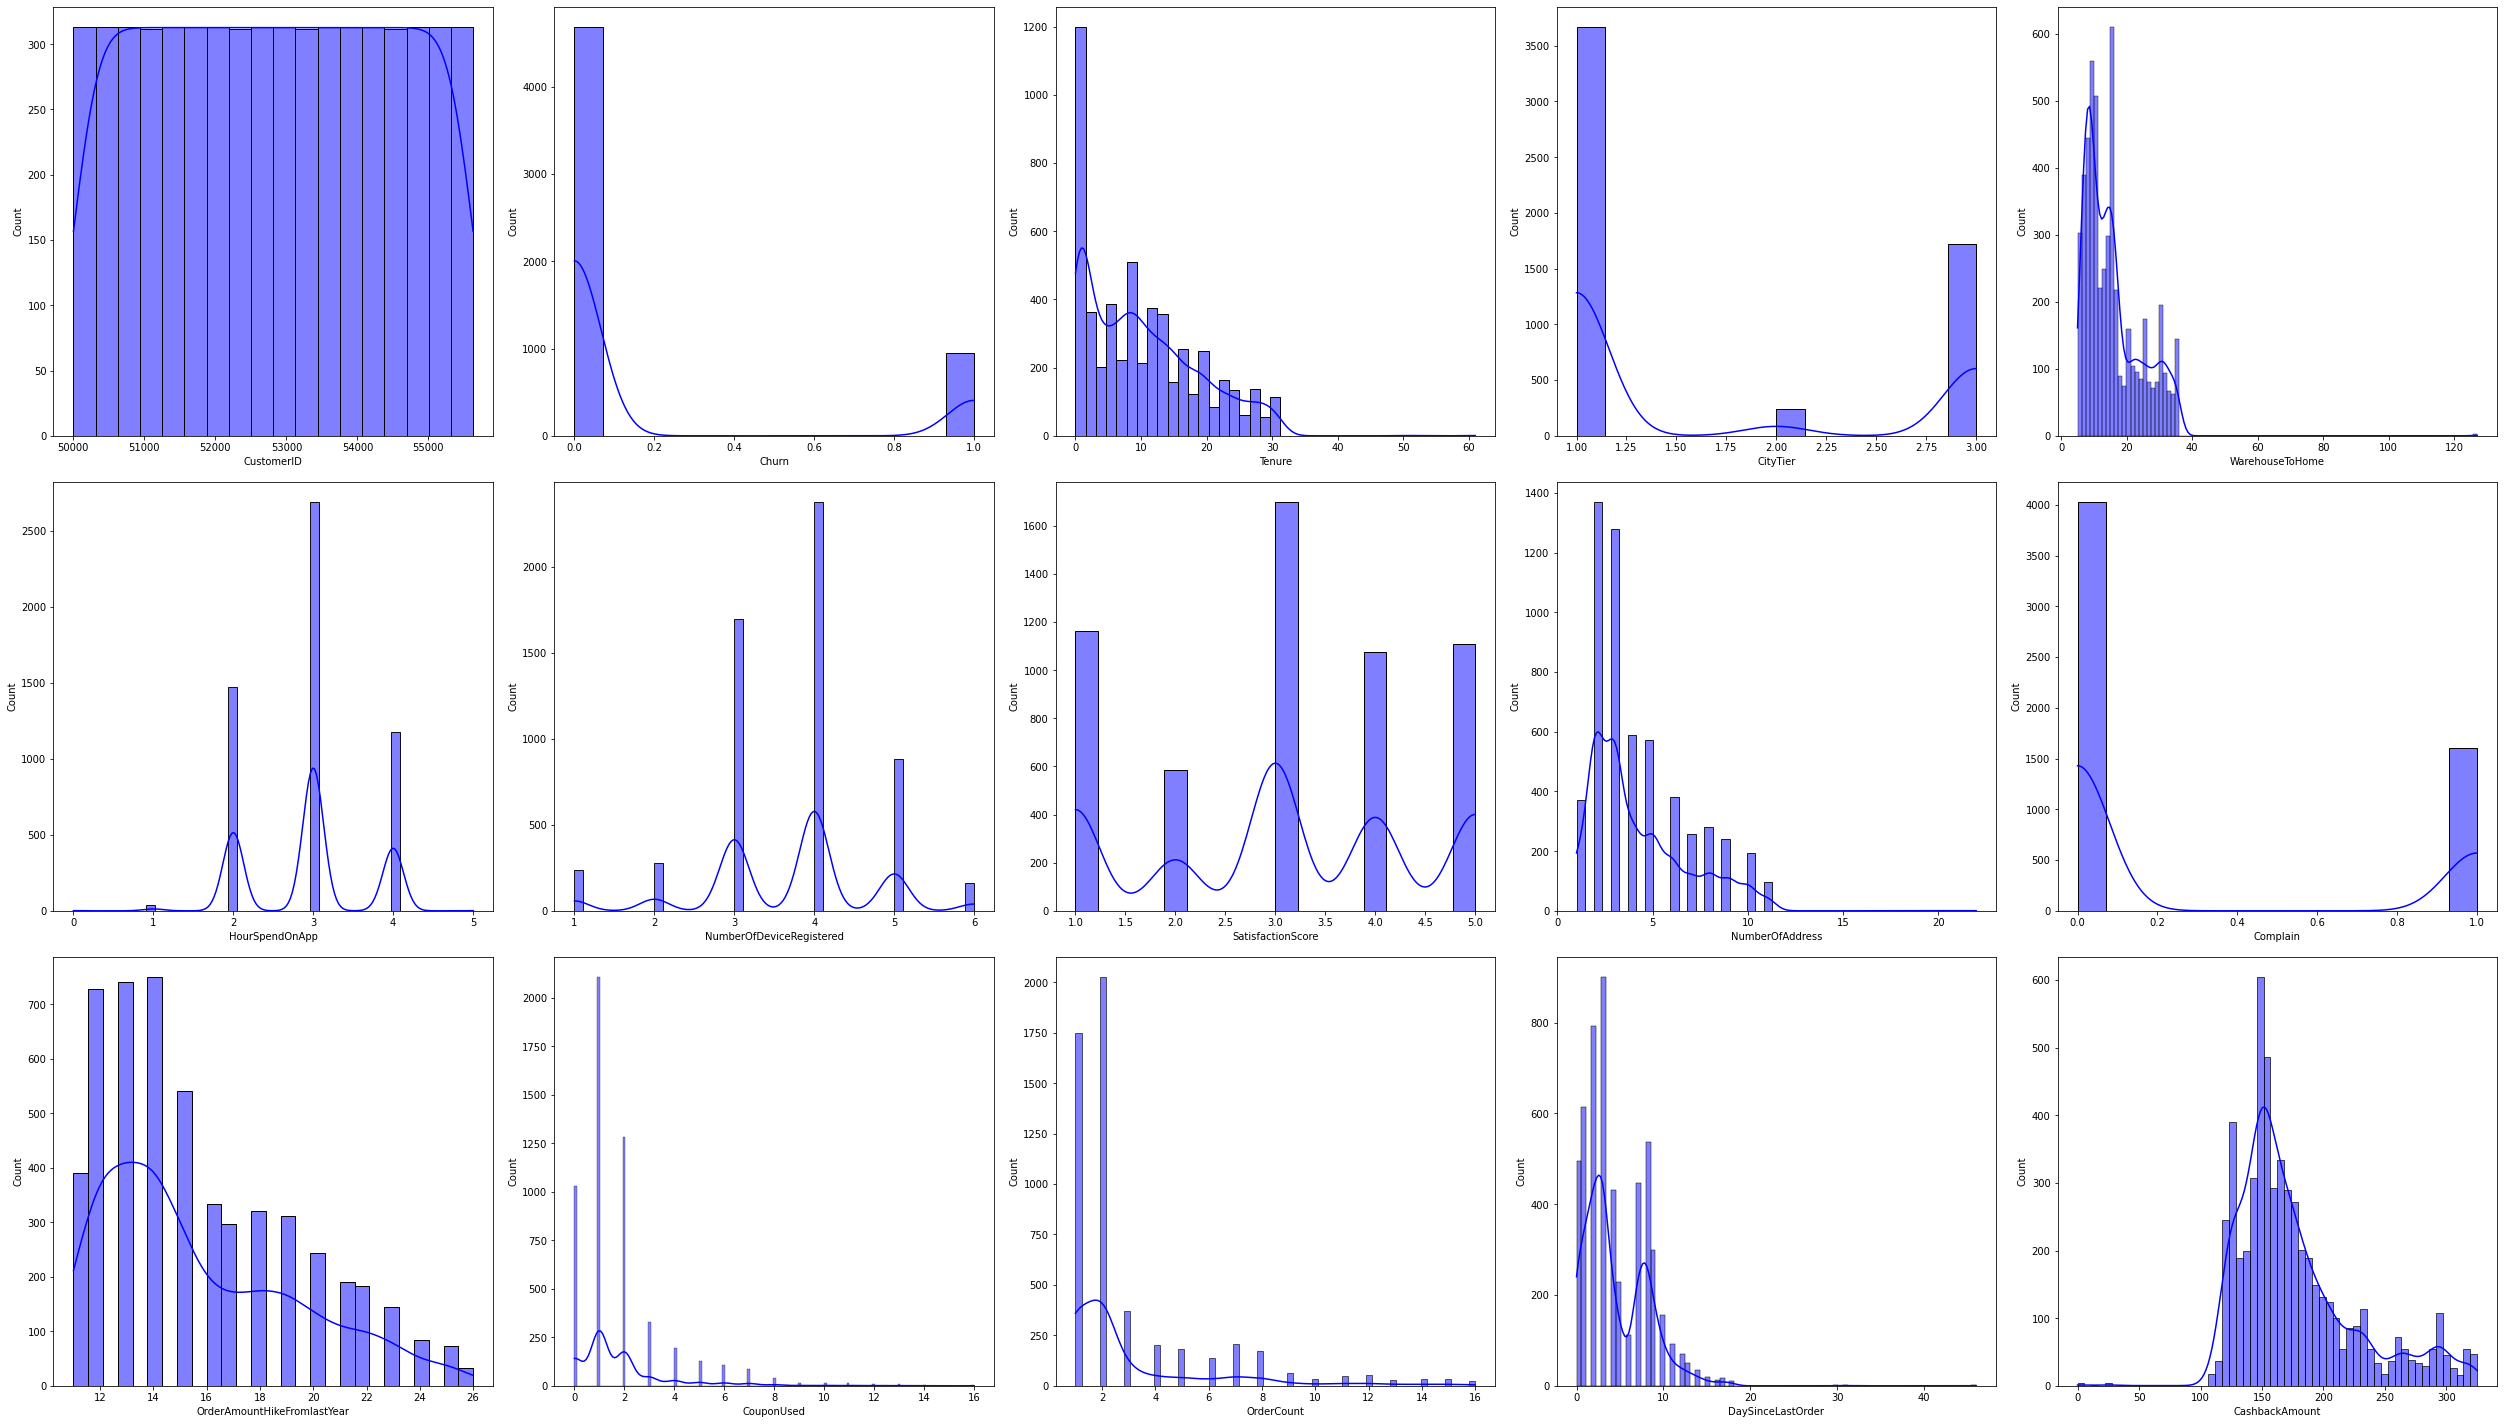

In [ ]:
plt.figure(figsize=(35, 20))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.histplot(df[nums[i]], color='blue', kde=True)
    plt.tight_layout(pad = 1.5)

*   Berdasarkan grafik di atas, jumlah customer yang tidak melakukan churn lebih banyak dari pada customer yang melakukan churn
*   Customer dengan Tenure 0-2 memiliki jumlah yang lebih banyak dibandingkan dengan bulan setelahnya
*   Jumlah customer dengan CityTier 1 lebih banyak dibandingkan dengan yang lain
*   Pada WareHouseToHome, jumlah customer lebih banyak pada jarak kurang dari 40
*   Pada HourSpendOnAPP, jumlah customer lebih banyak mengakses e-commerce selama 3 jam 
*   Pada NumberOfRegistered, jumlah customer lebih banyak pada 4 devices yang terdaftar pada e-commerce
*   Jumlah customer lebih banyak pada nilai SatisfactionScore 3 
*   Jumlah customer lebih banyak yang tidak complain
*   Jumlah customer lebih banyak pada CouponUsed 1 
*   Jumlah customer lebih banyak pada OrderCount 2











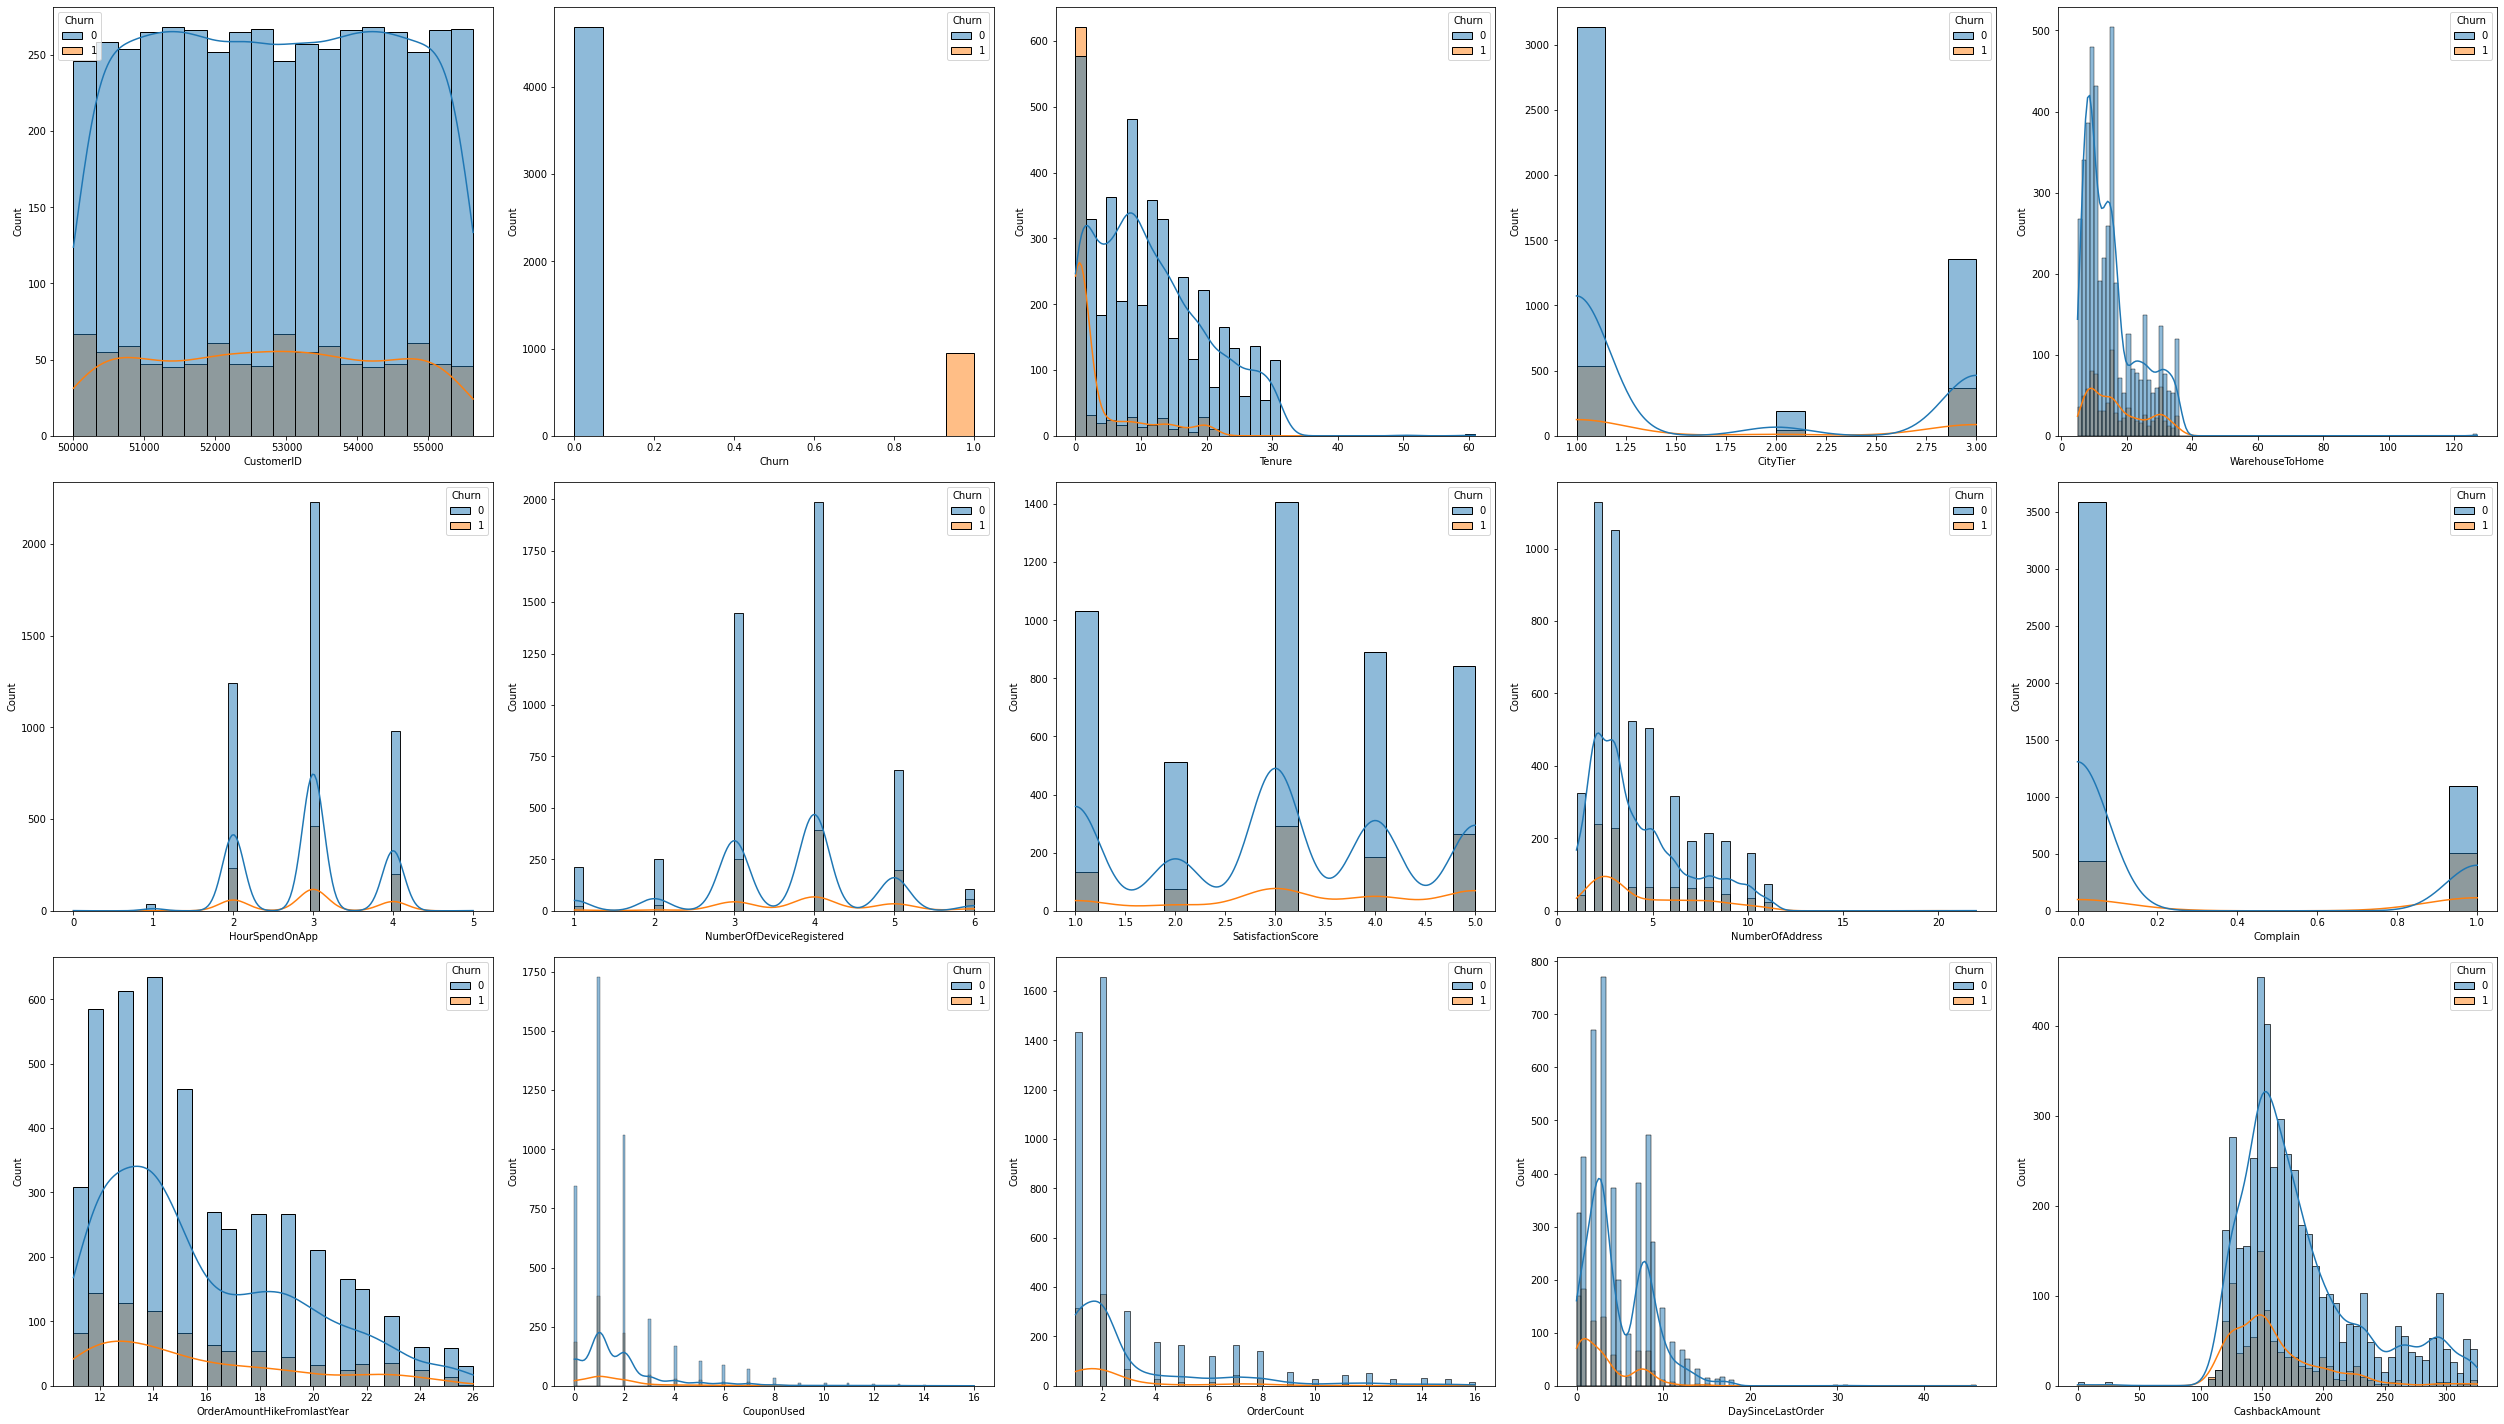

In [ ]:
plt.figure(figsize=(35, 20))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.histplot(data= df, x= df[nums[i]], color='blue', kde=True, hue='Churn')
    plt.tight_layout(pad = 1.5)

*   Berdasarkan grafik di atas Tenure 0-2 bulan pertama customer lebih banyak melakukan churn
*   Pada CityTier 1 customer lebih banyak melakukan Churn
*   Pada WareHouseToHome semakin jauh jarak rumah dengan gudang semakin sedikit customer yang melakukan churn 
*   Pada HourOfSpendApp, customer lebih banyak melakukan churn saat mengakses e-commerce selama 3 jam
*   Pada NumberOfDeviceRegistered, customer lebih banyak melakukan churn dengan 4 devices yang terdaftar dalam e-commerce
*   Nilai SatisfactionScore 3 customer lebih banyak melakukan churn
*   Customer yang melakukan complain lebih banyak melakukan churn
*   Pada CouponUsed 1 customer lebih banyak melakukan churn 
*   Pada OrderCount kurang dari 3 customer lebih banyak melakukan churn 












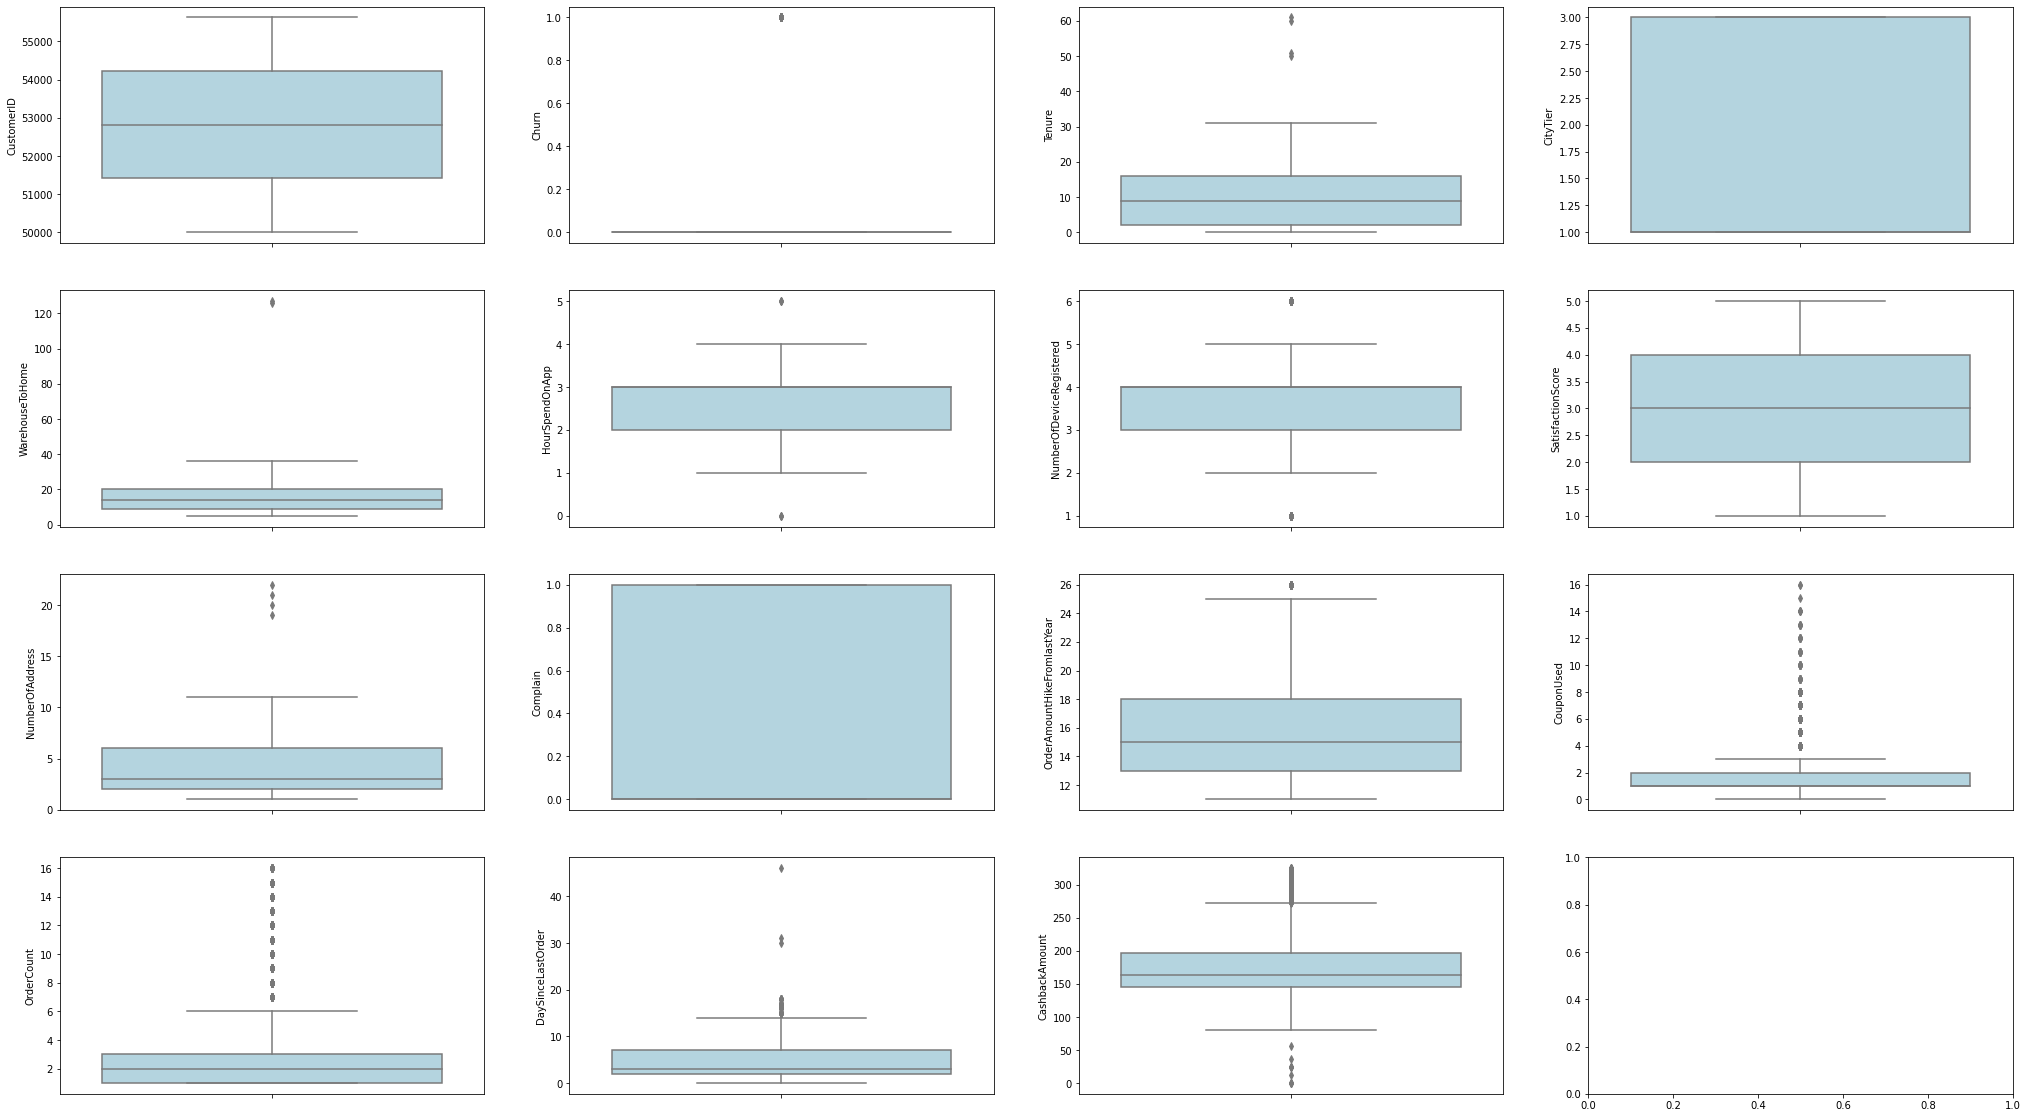

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(35, 20))
for i in range(0, len(nums)):
  plt.subplot(4,4, i+1)
  sns.boxplot(y=df[nums[i]], color='lightblue', orient='v')

Berdasarkan grafik di atas, kolom yang terdapat outlier adalah Tenure, WareHouseToHome, HourSpendOnAPP, NumberOfDevicesRegistered, NumberOfAdress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount



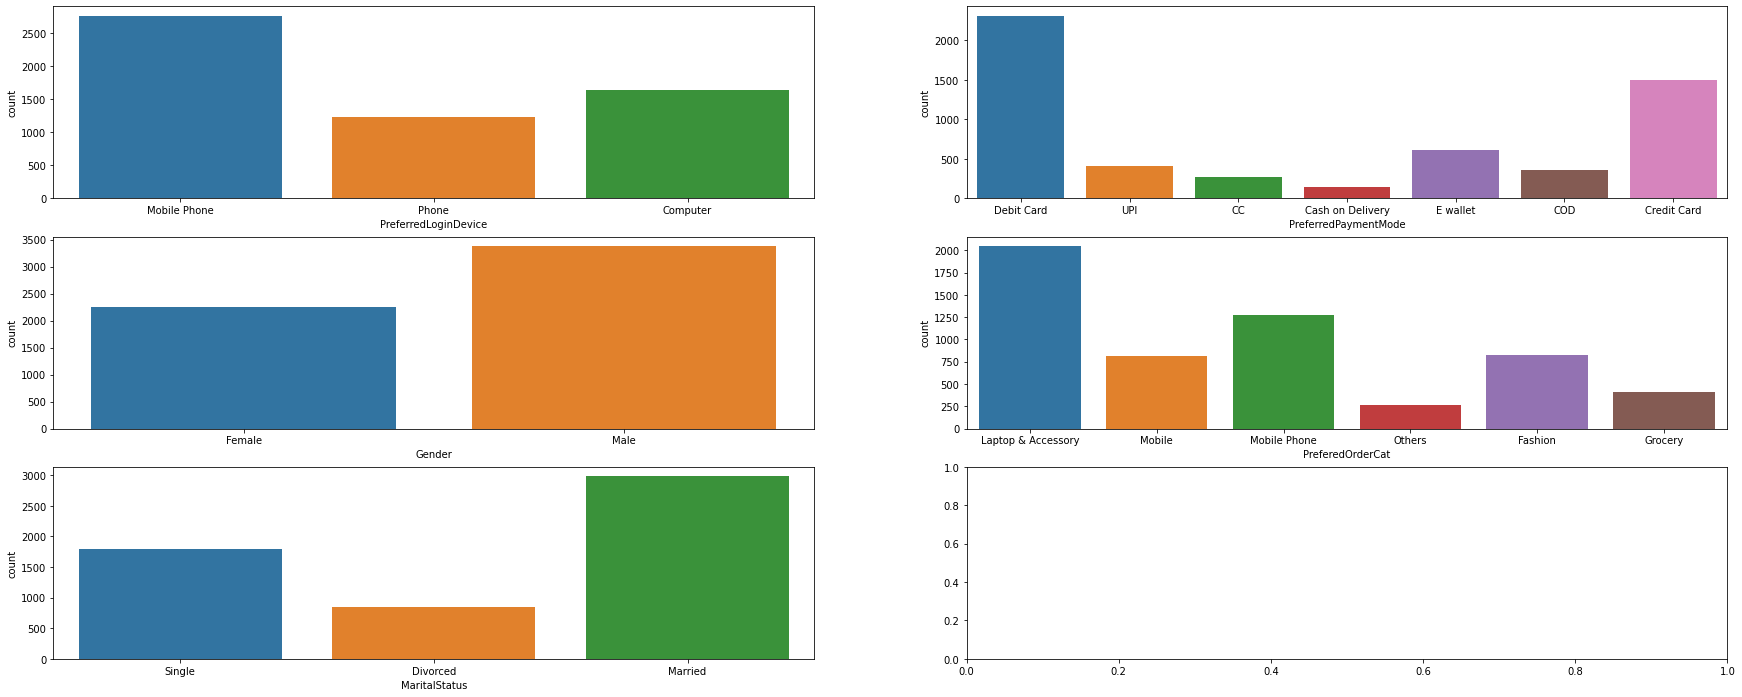

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(30,12))
for col,subplot in zip(cats, ax.flatten()):
  sns.countplot(x = df[col], ax=subplot)

*   Jumlah customer lebih banyak menggunakan mobile phone untuk login device 
*   Customer male lebih banyak dibandingkan dengan female
*   Customer dengan status marital married lebih banyak dibandingkan dengan yang lainnya
*   Customer yang melakukan metode pembayaran menggunakan debit card lebih banyak dibanding dengan metode pembayaran yang lainnya
*   Customer lebih banyak membeli laptop & Accessory dan mobile phone di e-commerce 




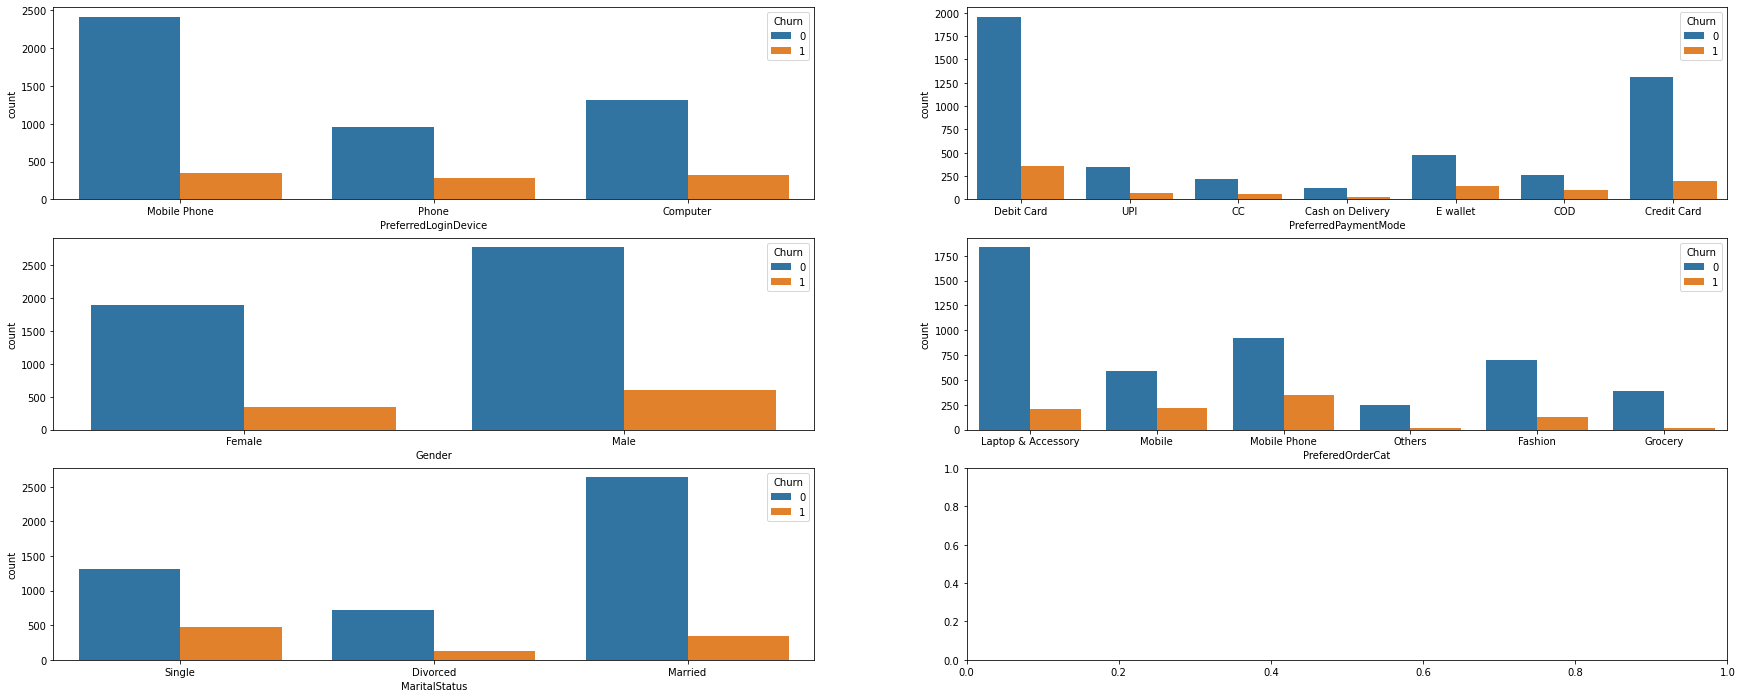

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(30,12))
for col,subplot in zip(cats, ax.flatten()):
  sns.countplot(x = df[col], ax=subplot, hue='Churn', data=df)

*   Customer lebih banyak melakukan churn saat menggunakan mobile phone untuk login device
*   Customer male lebih banyak melakukan churn
*   Customer dengan marital status single lebih banyak melakukan churn
*   Customer dengan metode pembayaran debit card dan credit card lebih banyak melakukan churn




## Multivariate Analysis

### Heatmap

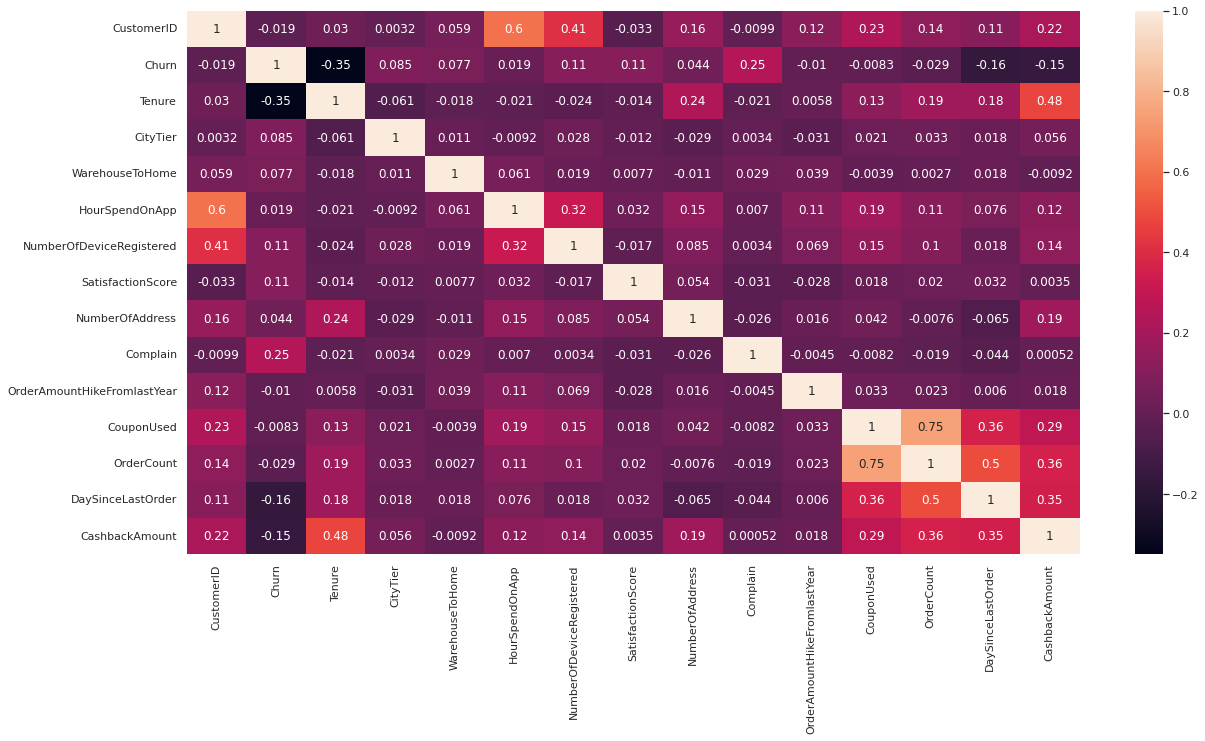

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

*   Berdasarkan grafik, ditentukan Churn sebagai target. Korelasi feature dengan target Churn paling tinggi adalah feature Tenure dengan nilai korelasi negatif yaitu -0.35. Dengan demikian, semakin rendah nilai Tenure maka semakin tinggi Churn rate.
*   Korelasi feature dengan target Churn tinggi lainnya adalah feature complain dengan nilai korelasi positif yaitu 0.25. Dengan demikian, semakin tinggi complain rate maka churn rate juga akan semakin tinggi.
*   Selain itu feature CouponUsed dan feature OrderCount berkorelasi kuat yaitu 0.75, hal ini make sense karena setiap pengguna dengan lebih banyak kupon dapat memesan lebih banyak barang
*   Terdapat korelasi yang kuat lainnya yaitu feature Tenure dengan feature CashbackAmount yaitu 0.48, hal ini menunjukkan semakin lama customer di ecommerce semakin banyak pula cashbackamount yang diperoleh.











## Analisis 2 Kolom Terhadap Business Metric

### Hubungan OrderCount dengan CouponUsed yang Mengalami Churn

<Figure size 1440x1440 with 0 Axes>

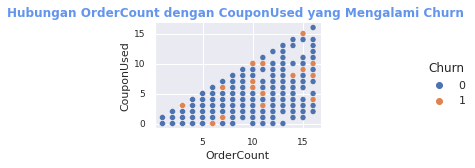

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(20,20))
ax = sns.pairplot(
    df,
    x_vars=["OrderCount"],
    y_vars=["CouponUsed"], diag_kind='kde', hue='Churn' 
)
plt.title('Hubungan OrderCount dengan CouponUsed yang Mengalami Churn ',color='cornflowerblue',fontsize=12,fontweight='bold')
plt.ylabel('CouponUsed', fontsize=11) # y axis label
plt.xlabel('OrderCount', fontsize=11) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 9);

plt.tight_layout()

OrderCount >= 5 dengan CouponUsed >= 10 rentan mengalami Churn

### Hubungan CashbackAmount dengan Tenure yang Mengalami Churn

<Figure size 1440x1440 with 0 Axes>

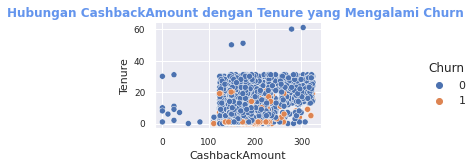

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(20,20))
ax = sns.pairplot(
    df,
    x_vars=["CashbackAmount"],
    y_vars=["Tenure"], diag_kind='kde', hue='Churn' 
)
plt.title('Hubungan CashbackAmount dengan Tenure yang Mengalami Churn ',color='cornflowerblue',fontsize=12,fontweight='bold')
plt.ylabel('Tenure', fontsize=11) # y axis label
plt.xlabel('CashbackAmount', fontsize=11) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 9);

plt.tight_layout()

Pada CashbackAmount 100 hingga 300 dengan Tenure di bawah 20, rentan mengalami churn

### Hubungan CashbackAmount dengan DaySinceLastOrder yang Mengalami Churn

<Figure size 1440x1440 with 0 Axes>

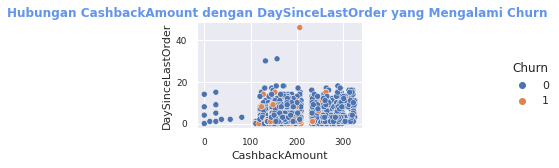

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.pairplot(
    df,
    x_vars=["CashbackAmount"],
    y_vars=["DaySinceLastOrder"], diag_kind='kde', hue='Churn' 
)
plt.title('Hubungan CashbackAmount dengan DaySinceLastOrder yang Mengalami Churn ',color='cornflowerblue',fontsize=12,fontweight='bold')
plt.ylabel('DaySinceLastOrder', fontsize=11) # y axis label
plt.xlabel('CashbackAmount', fontsize=11) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 9);

plt.tight_layout()

### Hubungan CashbackAmount dengan PreferedOrderCat yang Mengalami Churn

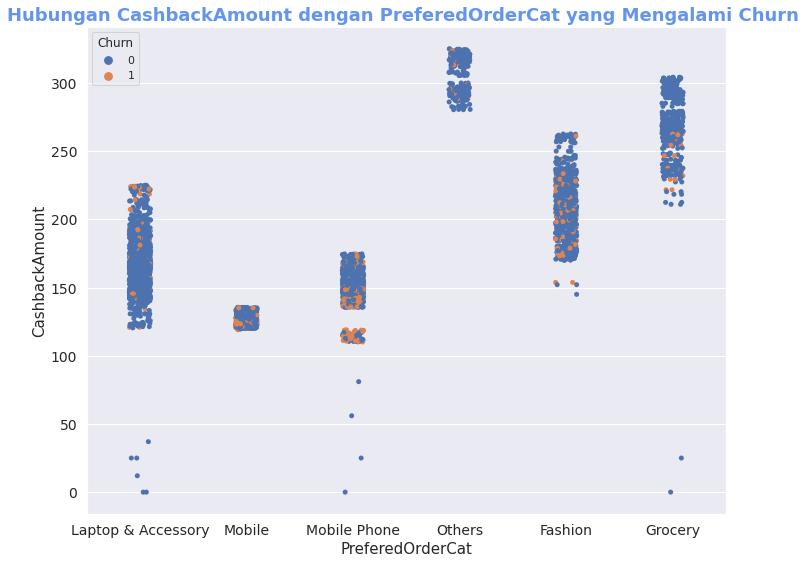

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
ax = sns.stripplot(x='PreferedOrderCat', y='CashbackAmount', hue='Churn', data=df)

plt.title('Hubungan CashbackAmount dengan PreferedOrderCat yang Mengalami Churn ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('CashbackAmount', fontsize=15) # y axis label
plt.xlabel('PreferedOrderCat', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

#ticks_loc = axt.get_yticks()
#axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#axt.set_yticklabels(labels =  ['0   ', '20   ', '40   ', '60   ', '80%  ', 100])

plt.tight_layout()

PreferedOrderCat Mobile Phone dengan CashbackAmount ~100-150 lebih banyak mengalami Churn

### Hubungan CityTier dengan SatisfactionScore yang Mengalami Churn

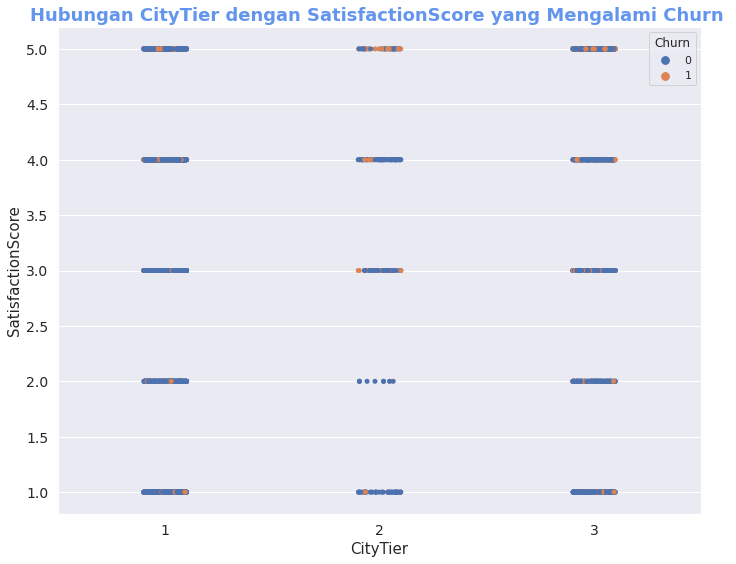

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
ax = sns.stripplot(x='CityTier', y='SatisfactionScore', hue='Churn', data=df)

plt.title('Hubungan CityTier dengan SatisfactionScore yang Mengalami Churn ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('SatisfactionScore', fontsize=15) # y axis label
plt.xlabel('CityTier', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

#ticks_loc = axt.get_yticks()
#axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#axt.set_yticklabels(labels =  ['0   ', '20   ', '40   ', '60   ', '80%  ', 100])

plt.tight_layout()

CityTier 2 dengan SatisfactionScore 5 lebih banyak mengalami Churn

### Hubungan Complain dengan SatisfactionScore yang Mengalami Churn

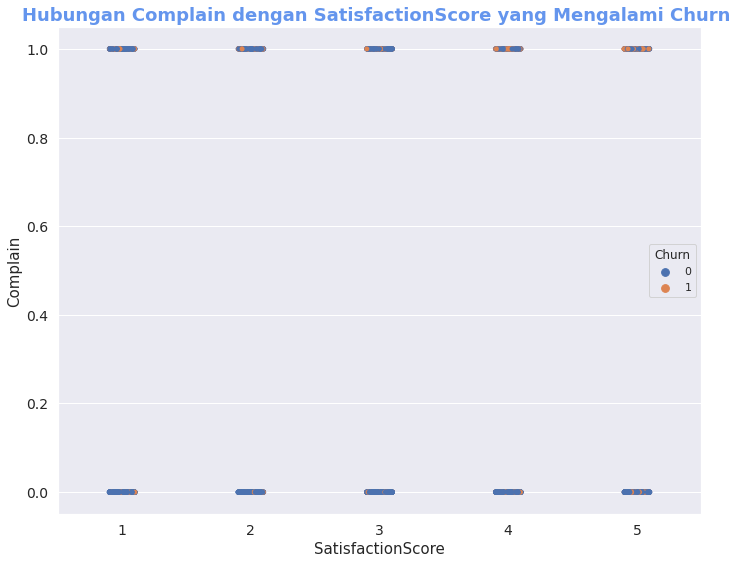

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
ax = sns.stripplot(x='SatisfactionScore', y='Complain', hue='Churn', data=df)

plt.title('Hubungan Complain dengan SatisfactionScore yang Mengalami Churn ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Complain', fontsize=15) # y axis label
plt.xlabel('SatisfactionScore', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

#ticks_loc = axt.get_yticks()
#axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#axt.set_yticklabels(labels =  ['0   ', '20   ', '40   ', '60   ', '80%  ', 100])

plt.tight_layout()

Semakin besar nilai SatisfactionScore dengan nilai Complain yang semakin besar, akan mengalami Churn yang lebih banyak pula.

## Business Insight

### Insights

Berdasarkan plots yang telah dianalisa, dapat diketahui insights berupa:

Terdapat tiga fitur yang mempengaruhi kuat churn rate, yaitu Tenure, CashbackAmount dan Complain.
Laptop & Accessory merupakan kategori dengan pencarian terbanyak oleh para customer.
Banyak terjadinya churn di kategori Mobile Phone, meskipun dengan adanya promo cashback.
Adanya churn pada feedback SatisfactionScore yang disertai complain, meskipun score nya sudah baik.
Semakin banyak OrderCount customer dengan coupon yang digunakan, semakin rentan untuk terjadi churn

### Rekomendasi bisnis

Berdasarkan insight-insight diatas, untuk mengurangi churn, perusahaan dapat melakukan hal-hal berikut:

Melakukan engagement untuk menarik kembali customer sudah lama tidak aktif.
Pengadaan promo cashback yang lebih banyak lagi, sehingga dapat menarik engagement dari para customer.
Memberikan rekomendasi produk sesuai kategori yang terpopuler berdasarkan minat customer sebelumnya, sehingga dapat menarik minat customer untuk melakukan pembelian.
Menyediakan platform saluran complain/feedback yang lebih terintegrasi dan mudah dibaca oleh perusahaan.
Memberikan coupon/voucher untuk mengatasi complain.
Meninjau dan menyesuaikan kembali coupon yang diberikan pada customer yang memiliki jumlah order banyak agar dapat memenuhi kepuasan customer.


# **Stage 2**

## Data Cleansing

### A. Handle Missing Values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Terdapat missing value pada kolom Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df.OrderAmountHikeFromlastYear.mean(), inplace=True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [ ]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
# Menghilangkan redudansi data
df['PreferredLoginDevice'].replace('Phone','Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True)
df['PreferredPaymentMode'].replace('Cash on Delivery','COD', inplace=True)
df['PreferedOrderCat'].replace('Mobile','Mobile Phone', inplace=True)

In [ ]:
print ("Number of Every Distinct Categorical Feature After Standardization\n")

for col_name in df.columns:
    if df[col_name].dtypes =='object':
        print ('\nNumber of unique category in {} : {}'.format(col_name, df[col_name].nunique()))
        print ('The values are :')
        print (df[col_name].value_counts())

Number of Every Distinct Categorical Feature After Standardization


Number of unique category in PreferredLoginDevice : 2
The values are :
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

Number of unique category in PreferredPaymentMode : 5
The values are :
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64

Number of unique category in Gender : 2
The values are :
Male      3384
Female    2246
Name: Gender, dtype: int64

Number of unique category in PreferedOrderCat : 5
The values are :
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Number of unique category in MaritalStatus : 3
The values are :
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


### B. Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

### C. Handle Outlier

In [ ]:
df[nums].describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.707922,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.587926,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
from scipy import stats

In [ ]:
# Handling with zscore
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Tenure', 'WarehouseToHome','CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5619


In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000
mean,52816.221392,0.168713,10.125467,1.653853,15.563623,2.934508,3.688201,3.065848,4.216409,0.285282,15.703257,1.712582,2.953728,4.454351,177.434362
std,1625.642617,0.374532,8.350080,0.915021,8.342056,0.705456,1.023898,1.380046,2.584108,0.451589,3.587036,1.849385,2.867241,3.565614,48.729207
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,37.000000
25%,51410.500000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.830000
50%,52815.000000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.340000
75%,54224.500000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.400000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.730000


### D. Feature Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
feature_trans = nums.copy()
del feature_trans[:2]
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(df[i])
  kts = kurtosis(df[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['Tenure', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
Distribusi Non Normal: ['WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


### E. Feature Encoding

In [ ]:
for col in cats:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column PreferredLoginDevice
Mobile Phone    3989
Computer        1630
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card     2312
Credit Card    1767
E wallet        612
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column Gender
Male      3376
Female    2243
Name: Gender, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Mobile Phone          2078
Laptop & Accessory    2045
Fashion                826
Grocery                408
Others                 262
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2976
Single      1796
Divorced     847
Name: MaritalStatus, dtype: int64
------------------------------ 



In [ ]:
mapping_login_device= {
    'Mobile Phone' : 0,
    'Computer' : 1
}

mapping_gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_marital_status = {
    'Married' : 0,
    'Single' : 1,
    'Divorced' : 2
}
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].map(mapping_login_device)
df['Gender'] = df['Gender'].map(mapping_gender)
df['MaritalStatus'] = df['MaritalStatus'].map(mapping_marital_status)

In [ ]:
for cat in ['PreferredPaymentMode', 'PreferedOrderCat']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
df = df.drop(columns=['PreferredPaymentMode','PreferedOrderCat']).copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           5619 non-null   int64  
 1   Churn                                5619 non-null   int64  
 2   Tenure                               5619 non-null   float64
 3   PreferredLoginDevice                 5619 non-null   int64  
 4   CityTier                             5619 non-null   int64  
 5   WarehouseToHome                      5619 non-null   float64
 6   Gender                               5619 non-null   int64  
 7   HourSpendOnApp                       5619 non-null   float64
 8   NumberOfDeviceRegistered             5619 non-null   int64  
 9   SatisfactionScore                    5619 non-null   int64  
 10  MaritalStatus                        5619 non-null   int64  
 11  NumberOfAddress               

In [ ]:
feature = df.columns.tolist()
del feature[:2]
feature

['Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredPaymentMode_COD',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others']

### F. Handle Class Imbalance

In [ ]:
#Menampilkan jumlah pelanggan churn dan tidak, membuat target bertipe categorical
df['Churn_Class'] = df['Churn']>0.9
print(df['Churn_Class'].value_counts())

False    4671
True      948
Name: Churn_Class, dtype: int64


In [ ]:
#Pemisahan feature dan target
x = df[[col for col in df.columns if col not in ['Churn_Class','Churn']]].values
y = df['Churn_Class'].values
print(x.shape)
print(y.shape)

(5619, 27)
(5619,)


In [ ]:
#Proses undersampling dan oversampling
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler(1.0).fit_resample(x, y)
x_over, y_over = over_sampling.RandomOverSampler(1.0).fit_resample(x, y)
x_smote, y_smote = over_sampling.SMOTE().fit_resample(x, y)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
print(pd.Series(y).value_counts())

False    4671
True      948
dtype: int64


In [ ]:
print(pd.Series(y_over).value_counts())

True     4671
False    4671
dtype: int64


In [ ]:
print(pd.Series(y_under).value_counts())

False    948
True     948
dtype: int64


In [ ]:
print(pd.Series(y_smote).value_counts())

True     4671
False    4671
dtype: int64


## Feature Engineering

### Feature Selection
Feature selection tidak dapat dilakukan karena semua feature digunakan untuk modelling

### Feature Extraction


Menambahkan feature average churn

In [ ]:
df['avg_cashback_per_order'] = df['CashbackAmount'] / df['OrderCount']

In [ ]:
churn_percentage = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count()),2)

In [ ]:
print ('rata-rata churn adalah', churn_percentage, '%')

rata-rata churn adalah 20.3 %


## Feature Tambahan
1. Age = untuk mengetahui persebaran umur yang lebih banyak churn.
2. Product recommendation = untuk dapat mengukur kategori mana yang dapat ditawari promo.
3. Product review = menggali ulasan customer sehingga dapat membantu keputusan pembelian bagi customer berikutnya.
4. Call-to-action = memberikan informasi baru tentang produk-produk atau promo sehingga dapat menarik perhatian customer.

# **Stage 3**

## Split Data

In [ ]:
# split data train dan test
transform = feature_normal + feature_non_normal
x = df[feature]
y = df['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
from imblearn import over_sampling
x_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(x_train, y_train)

In [ ]:
x_train.shape

(3933, 26)

In [ ]:
y_train.shape

(3933,)

In [ ]:
print(pd.Series(y_train).value_counts())

0    3249
1     684
Name: Churn, dtype: int64


In [ ]:
# Sebelum over sampling menggunakan SMOTE
print('Target sebelum oversampling:')
print(pd.Series(y_train).value_counts())

Target sebelum oversampling:
0    3249
1     684
Name: Churn, dtype: int64


In [ ]:
# Setelah over sampling menggunakan SMOTE
print('Target setelah oversampling:')
print(pd.Series(y_train_smote).value_counts())

Target setelah oversampling:
0    3249
1    3249
Name: Churn, dtype: int64


In [ ]:
x_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               6498 non-null   float64
 1   PreferredLoginDevice                 6498 non-null   int64  
 2   CityTier                             6498 non-null   int64  
 3   WarehouseToHome                      6498 non-null   float64
 4   Gender                               6498 non-null   int64  
 5   HourSpendOnApp                       6498 non-null   float64
 6   NumberOfDeviceRegistered             6498 non-null   int64  
 7   SatisfactionScore                    6498 non-null   int64  
 8   MaritalStatus                        6498 non-null   int64  
 9   NumberOfAddress                      6498 non-null   int64  
 10  Complain                             6498 non-null   int64  
 11  OrderAmountHikeFromlastYear   

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for i in transform:
  scaler = StandardScaler().fit(x_train[[i]])
  x_train[i] = scaler.transform(x_train[[i]])
  x_test[i] = scaler.transform(x_test[[i]])

x_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,...,PreferredPaymentMode_COD,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
271,0.702379,0,-0.715693,-0.193324,1,0.083773,-0.692300,-0.040349,0,0.312109,...,0,0,0,0,1,0,0,1,0,0
3567,1.181535,0,-0.715693,-0.782646,0,0.083773,0.294227,-0.768303,0,-0.079571,...,1,0,0,0,0,0,0,1,0,0
4597,-0.735090,0,1.468879,-0.193324,0,0.083773,0.294227,0.687605,1,-0.862930,...,0,0,0,1,0,0,0,0,1,0
5109,0.343012,0,-0.715693,1.103185,0,0.083773,0.294227,-0.040349,1,-0.862930,...,0,0,1,0,0,0,0,1,0,0
2450,-0.495512,0,1.468879,-0.193324,0,-1.348751,-0.692300,1.415559,0,-0.471251,...,0,0,1,0,0,0,0,1,0,0


## Modeling

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(x_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### Decision Tree

#### Fit Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.77
Recall (Test Set): 0.86
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9606247004628745


#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
model.fit(x_train, y_train)

# Predict & Evaluation
y_pred = model.predict(x_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.61
Recall (Test Set): 0.65
F1-Score (Test Set): 0.63
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9878154503088787
roc_auc (crossval test): 0.9459065414544362


#### Feature Importance

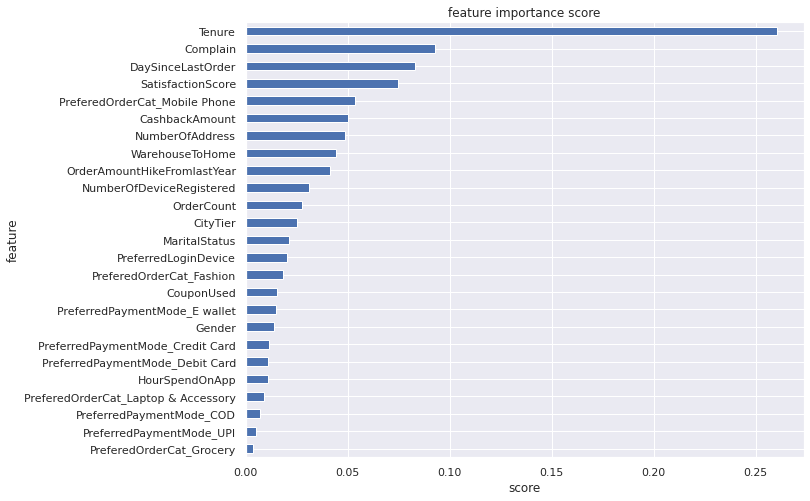

In [ ]:
show_feature_importance(model.best_estimator_)

### Logistic Regression

#### Fit Model

In [ ]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.70
Recall (Test Set): 0.56
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8803694726560861
roc_auc (crossval test): 0.8785924008696995


#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=50)
rs.fit(x_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.70
Recall (Test Set): 0.50
F1-Score (Test Set): 0.58
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8813765852829913
roc_auc (crossval test): 0.8797354588235052


#### Check the best hyperparameter after tuning

In [ ]:
show_best_hyperparameter(rs)

{'C': 0.0494959595959596, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### Feature Importance

In [ ]:
x.columns

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others'],
      dtype='object')

In [ ]:
rs.best_estimator_.coef_

array([[-1.40313596,  0.29411879,  0.29521436,  0.21153354, -0.2410127 ,
        -0.16235036,  0.2813227 ,  0.41040019,  0.26122009,  0.50586714,
         0.70559681, -0.0408039 ,  0.01041412,  0.39648147, -0.36802732,
        -0.19988222,  0.33347238, -0.23311273, -0.06588753,  0.19191533,
        -0.22613146,  0.01677889,  0.05835514, -0.79695244,  0.31852835,
         0.40354604]])

#### Learning Curve

param value: 0.0001; train: 0.8531437473338623; test: 0.8656075523164131
param value: 0.0006040404040404041; train: 0.8618571796270197; test: 0.8724054894940971
param value: 0.0011080808080808082; train: 0.8664456359941611; test: 0.8755167710863916
param value: 0.0016121212121212123; train: 0.8695932531647165; test: 0.8775092699143332
param value: 0.002116161616161616; train: 0.8718247089972803; test: 0.8789050846012871
param value: 0.0026202020202020205; train: 0.8735733352052544; test: 0.8799812470698547
param value: 0.0031242424242424243; train: 0.8749439773641552; test: 0.880777713847334
param value: 0.003628282828282828; train: 0.8760554304608346; test: 0.88149959510719
param value: 0.004132323232323233; train: 0.8770030904695822; test: 0.8820589864893662
param value: 0.004636363636363637; train: 0.8777302597830372; test: 0.8824532242253761
param value: 0.0051404040404040416; train: 0.8784142309194551; test: 0.8828527894983591
param value: 0.005644444444444445; train: 0.8790023561

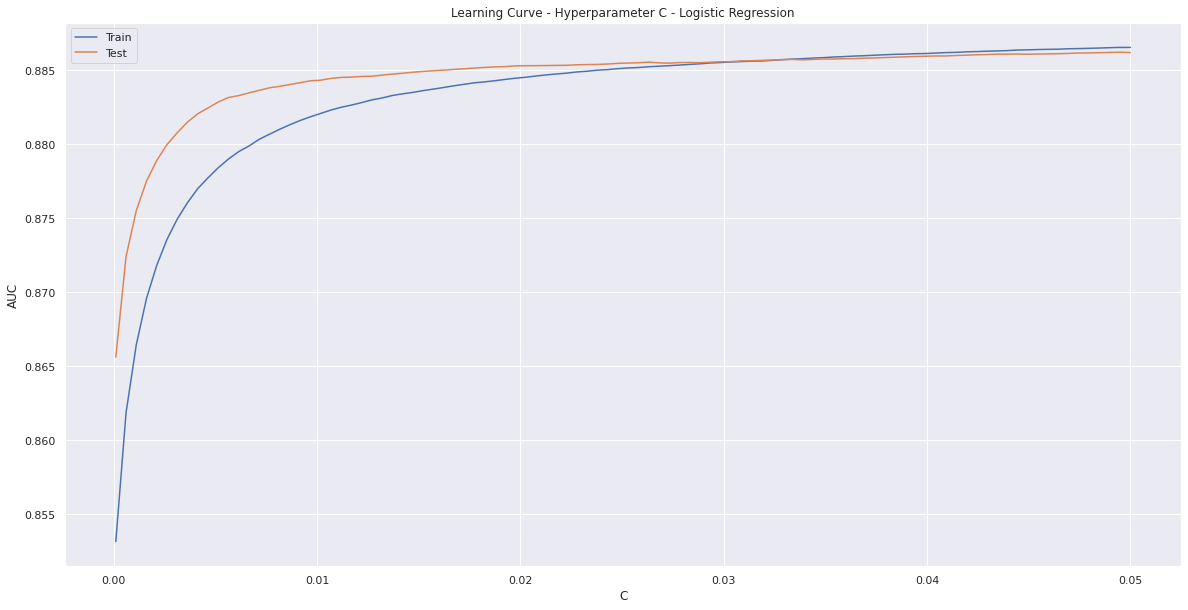

In [ ]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

### k-Nearest Neighbor

#### Fit Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_smote, y_train_smote) 
eval_classification(knn)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.50
roc_auc (crossval train): 0.9544179636343728
roc_auc (crossval test): 0.8997651175967748


#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(x_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(x_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.83
Recall (Test Set): 0.65
F1-Score (Test Set): 0.73
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9616432582289886
roc_auc (crossval test): 0.9167196744082007


#### Learning Curve

param value: 1; train: 1.0; test: 0.9222445978775092
param value: 2; train: 0.9985785099868786; test: 0.9331713762093509
param value: 3; train: 0.9957848028813184; test: 0.9355700997314922
param value: 4; train: 0.9914530606808393; test: 0.943180486297575
param value: 5; train: 0.9886519288886009; test: 0.9408643395985168
param value: 6; train: 0.9847643179457827; test: 0.9411986425435792
param value: 7; train: 0.9802969064705469; test: 0.9390716234070664
param value: 8; train: 0.9745465991335165; test: 0.9354742040659763
param value: 9; train: 0.9698604968870314; test: 0.9311549034650299
param value: 10; train: 0.9652891397983004; test: 0.9270966521757661
param value: 11; train: 0.961291283507836; test: 0.9225695776328688
param value: 12; train: 0.9571354838825802; test: 0.9187031176746366
param value: 13; train: 0.9546441640162785; test: 0.9148526403273239
param value: 14; train: 0.9510278916229735; test: 0.9114949601500234
param value: 15; train: 0.9475387388652198; test: 0.90902431

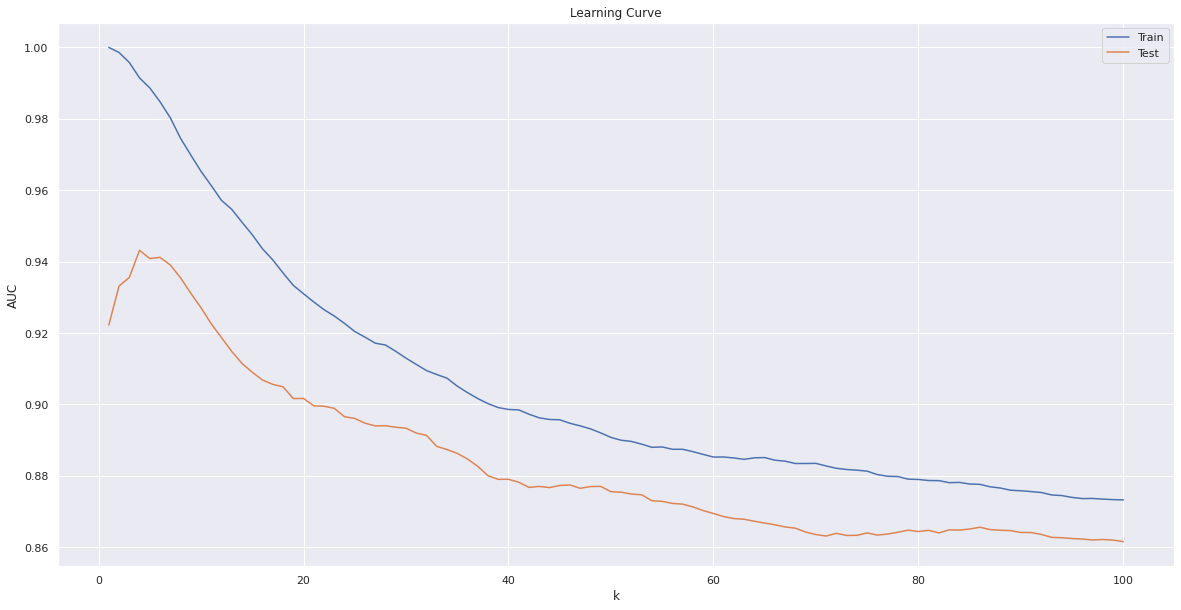

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(x_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

### ADABoost

#### Fit Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train_smote, y_train_smote)
eval_classification(ada)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.69
Recall (Test Set): 0.04
F1-Score (Test Set): 0.08
roc_auc (test-proba): 0.74
roc_auc (train-proba): 0.72
roc_auc (crossval train): 0.929020862782937
roc_auc (crossval test): 0.9184039229544763


#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
ab_tuned.fit(x_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.75
Recall (Test Set): 0.65
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9318222136324656
roc_auc (crossval test): 0.9231290120994512


#### Feature Importance

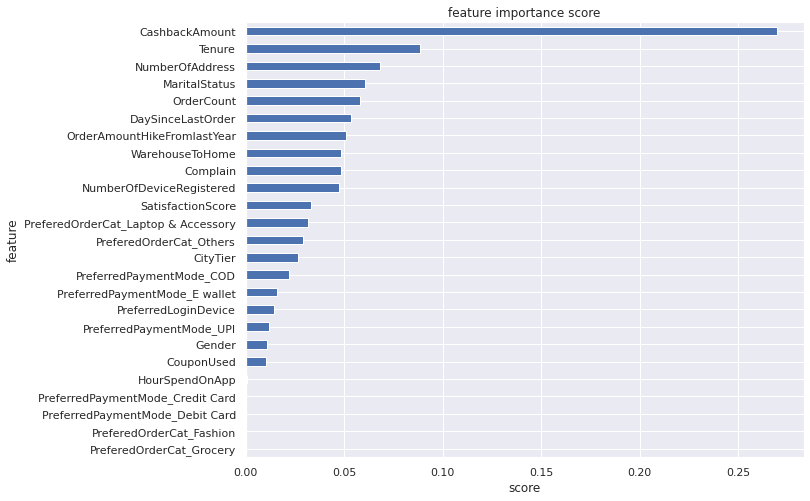

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)

### XGBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(x_train_smote, y_train_smote)
eval_classification(xg)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.52
Recall (Test Set): 0.24
F1-Score (Test Set): 0.33
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.70
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9989179162017449


#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(x_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.88
Recall (Test Set): 0.86
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999687337783534
roc_auc (crossval test): 0.9968051802706837


#### Feature Importance

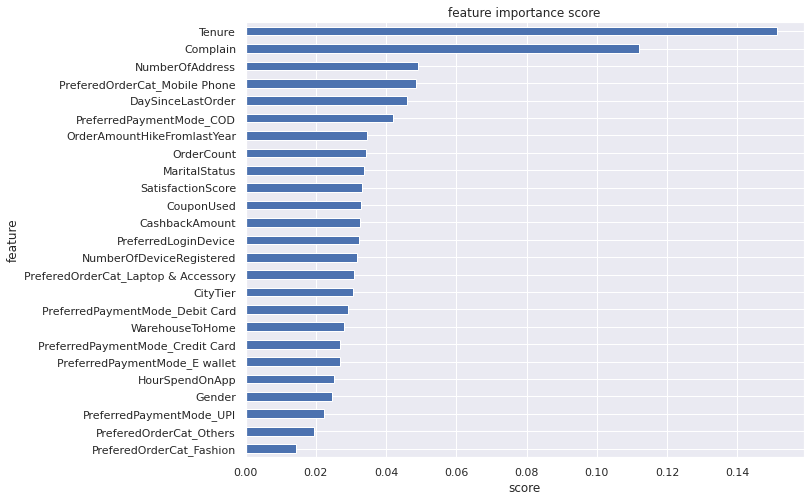

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_smote, y_train_smote)
eval_classification(rf)

#### Hyperparameter Tuning

In [ ]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(x_train_smote, y_train_smote)
eval_classification(rs)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.34
Recall (Test Set): 0.39
F1-Score (Test Set): 0.36
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.66
roc_auc (crossval train): 0.9974381107037695
roc_auc (crossval test): 0.9853010551815917


#### Learning Curve

param value: 2; train: 0.9999473522217363; test: 0.9760114328943443
param value: 3; train: 0.9990541399152956; test: 0.9732637557004646
param value: 4; train: 0.9971066221005473; test: 0.9660449431019053
param value: 5; train: 0.9936134195136965; test: 0.9621371947321314
param value: 7; train: 0.986642763675373; test: 0.9567750287686997
param value: 8; train: 0.9845080537601314; test: 0.9520361846311213
param value: 9; train: 0.9800761907847488; test: 0.948919575501854
param value: 11; train: 0.9748361619139673; test: 0.9466686911307164
param value: 12; train: 0.9723779156519595; test: 0.9441967139751951
param value: 13; train: 0.9698152737954459; test: 0.9401957337083919
param value: 14; train: 0.9663747189868588; test: 0.9399533307761156
param value: 16; train: 0.963379645378965; test: 0.9373881217235648
param value: 17; train: 0.9605825634158238; test: 0.9371776840131271
param value: 18; train: 0.9575892897319732; test: 0.9342422111409453
param value: 20; train: 0.9545582176432155; 

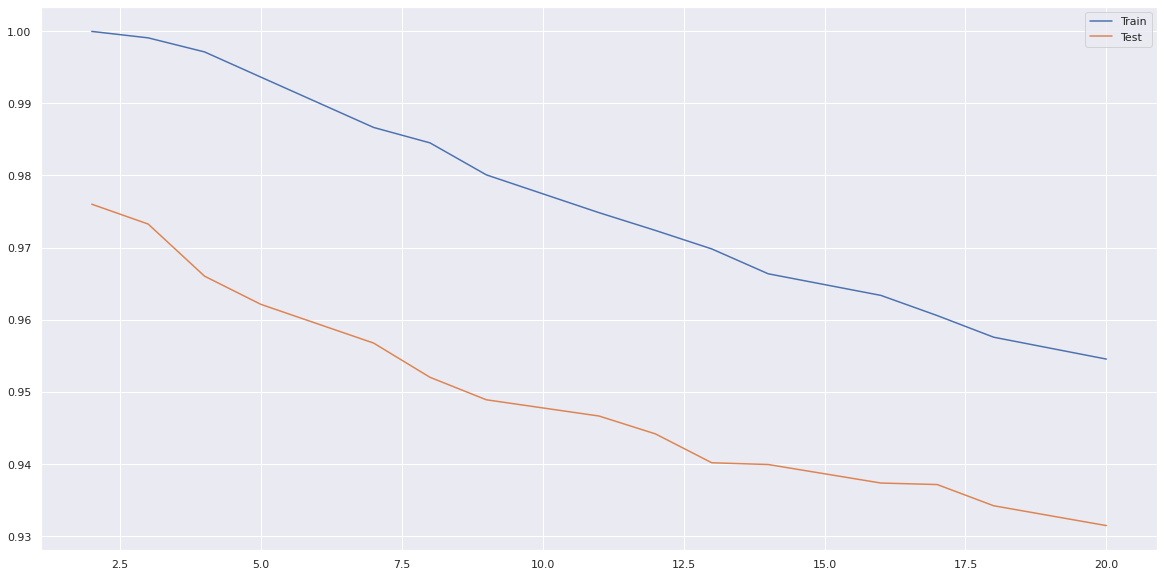

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(x_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Feature Importance

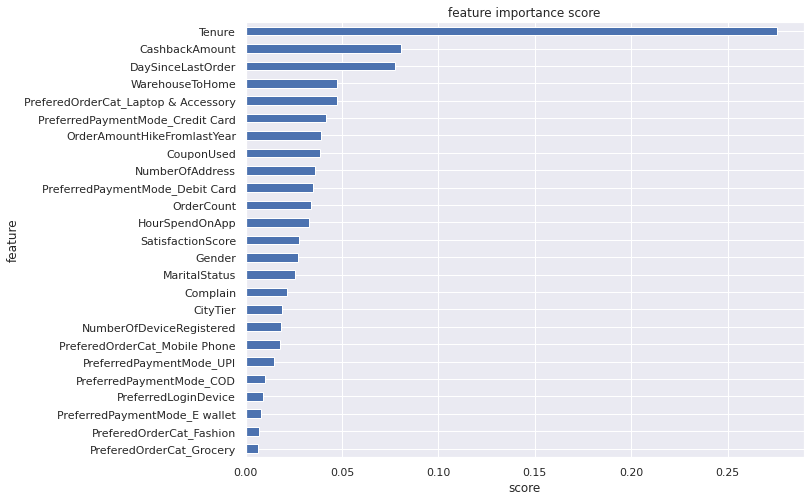

In [ ]:
show_feature_importance(rs.best_estimator_)

### Stacking

#### Choosing the baseline

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model, hyperparameters, cv=5, scoring_fit='roc_auc'):
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42, error_score='raise') # Use GridSearch better if you have more resource & time
    rs.fit(X_train_data, y_train_data)
    best_model = rs.best_estimator_
    
    pred = rs.predict(X_test_data)
    pred_proba = rs.predict(X_test_data)
    score = roc_auc_score(y_test_data, pred_proba)
    return [best_model, pred, score]

models_to_train = [LogisticRegression(), 
                   KNeighborsClassifier(), 
                   DecisionTreeClassifier(), 
                   RandomForestClassifier(), 
                   AdaBoostClassifier(random_state=42), 
                   XGBClassifier(random_state=42)
                  ]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2'],
        'C': [float(x) for x in np.linspace(0.0001, 0.5, 100)]
    },
    { # KNearestNeighbor
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': [int(x) for x in np.linspace(1, 110, num = 30)],
        'min_samples_split': [2, 5, 10, 100],
        'min_samples_leaf': [1, 2, 4, 10, 20, 50],
        'max_features': ['auto', 'sqrt'],
        'criterion' : ['gini', 'entropy'],
        'splitter' : ['best', 'random']
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(1, 200, 50)],
        'max_depth': [int(x) for x in np.linspace(2, 100, 50)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(2, 20, 10)],
        'min_samples_leaf': [int(x) for x in np.linspace(2, 20, 10)],
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(x_train, x_test, y_train, y_test,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

Model: LogisticRegression, Score: 0.7547148702211993
Model: KNeighborsClassifier, Score: 0.8138025827899246
Model: DecisionTreeClassifier, Score: 0.7485216084899629
Model: RandomForestClassifier, Score: 0.8444572305331799
Model: AdaBoostClassifier, Score: 0.8038214422708094
Model: XGBClassifier, Score: 0.917130162383327


#### Do the stacking

In [ ]:
# Model: KNeighborsClassifier, Score: 0.8138025827899246
# Model: RandomForestClassifier, Score: 0.8444572305331799
# Model: XGBClassifier, Score: 0.917130162383327

# define level-1 algorithm
level1 = list()
level1.append(('kn', LogisticRegression()))
level1.append(('rf', AdaBoostClassifier()))
level1.append(('xg', XGBClassifier()))

# define level-2 algorithm
level2 = XGBClassifier()

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(x_train_smote,y_train_smote)
eval_classification(stacking_model)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.36
Recall (Test Set): 0.40
F1-Score (Test Set): 0.38
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.69
roc_auc (crossval train): 0.9999968252271778
roc_auc (crossval test): 0.9978952442425901


### Simple Ensemble Method: Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

vote_model = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(C=0.0494959595959596)), 
        ('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)), 
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('ab', AdaBoostClassifier()),
        ('xg', XGBClassifier()),
    ], voting = 'soft')

vote_model.fit(x_train, y_train)
eval_classification(vote_model)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.92
Recall (Test Set): 0.83
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9977295541640118


Dengan melihat nilai roc-auc yang memiliki gap paling kecil dan nilai precision yang besar, dari beberapa hasil uji model yang telah dilakukan dipilih model machine learning yaitu XGBoost. 

Evaluasi Feature Importance & Business Insight:
*   Feature Complain merupakan feature tertinggi kedua setelah Tenure yang menyebabkan customer churn, dimana semakin banyak customer complain, maka semakin tinggi probabilitas seorang customer untuk churn.
*   Pada feature NumberOfAddress, banyaknya jumlah alamat yang terdaftar akan mempengaruhi potensi churn.
*   Pada feature PreferredOrderCat dengan kategori mobile phone, besarnya order yang dilakukan dapat mempengaruhi customer churn.
*   Pada feature DaySinceLastOrder, semakin lama interval pemesanan, maka akan semakin besar potensi customer melakukan churn.











## Handling Tenure Recommendation


*   Untuk customer dengan tenure 0-2 bulan dapat diberikan package promo cashback untuk mencegah potensi churn terhadap customer baru.
*   Memberi pesan notifikasi secara rutin bagi customer yang sudah pernah memesan untuk dapat kembali memesan produk-produk lainnya (repeat order).
*   Memberikan reward berupa membership ataupun voucher-voucher berskala dengan seberapa aktif/loyal customer tersebut.









## Handling Complain Recommendation
*   Untuk customer complain, dapat dibuatkan channel khusus untuk feedback, sekaligus memberikan voucher yang adaptif terhadap kerugian yang dialami.
*   Menyediakan pelayanan 24/7 yang sigap (dapat difilter melalui AI terlebih dahulu atau langsung kontak customer service).
*   Memberikan garansi jaminan produk sebagai cara preventif mencegah/meminimalisir adanya customer complain.











# Business Recomendation 
* Untuk customer dengan tenure 0-2 bulan dapat diberikan package promo cashback untuk mencegah potensi churn terhadap customer baru.
* Untuk customer complain, dapat dibuatkan channel khusus untuk feedback, sekaligus diberikan voucher tertentu atas kerugian yang dialami.
* Dapat bekerja sama dengan layanan digital wallet lainnya agar customer dapat melakukan transaksi selain menggunakan debit/kredit.
* Memberikan rekomendasi produk sesuai kategori yang terpopuler berdasarkan minat customer sebelumnya, sehingga dapat menarik minat customer untuk melakukan pembelian.
* Memberi pesan notifikasi bagi customer yang sudah pernah memesan, untuk ditarik kembali memesan produk-produk lainnya.



